In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
df = pd.read_csv('../data/data2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2112 non-null   int64  
 1   Substrate  2112 non-null   object 
 2   Ceramic    2112 non-null   object 
 3   Thickness  2112 non-null   float64
 4   Lsub       2112 non-null   float64
 5   asub       2112 non-null   float64
 6   bsub       2112 non-null   float64
 7   Lcer       2112 non-null   float64
 8   acer       2112 non-null   float64
 9   bcer       2112 non-null   float64
 10  L          2112 non-null   float64
 11  a          2112 non-null   float64
 12  b          2112 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 214.6+ KB


In [17]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [18]:
all_regs

[ARDRegression(),
 AdaBoostRegressor(),
 BaggingRegressor(),
 BayesianRidge(),
 CCA(),
 DecisionTreeRegressor(),
 DummyRegressor(),
 ElasticNet(),
 ElasticNetCV(),
 ExtraTreeRegressor(),
 ExtraTreesRegressor(),
 GammaRegressor(),
 GaussianProcessRegressor(),
 GradientBoostingRegressor(),
 HistGradientBoostingRegressor(),
 HuberRegressor(),
 IsotonicRegression(),
 KNeighborsRegressor(),
 KernelRidge(),
 Lars(),
 LarsCV(),
 Lasso(),
 LassoCV(),
 LassoLars(),
 LassoLarsCV(),
 LassoLarsIC(),
 LinearRegression(),
 LinearSVR(),
 MLPRegressor(),
 MultiTaskElasticNet(),
 MultiTaskElasticNetCV(),
 MultiTaskLasso(),
 MultiTaskLassoCV(),
 NuSVR(),
 OrthogonalMatchingPursuit(),
 OrthogonalMatchingPursuitCV(),
 PLSCanonical(),
 PLSRegression(),
 PassiveAggressiveRegressor(),
 PoissonRegressor(),
 QuantileRegressor(),
 RANSACRegressor(),
 RadiusNeighborsRegressor(),
 RandomForestRegressor(),
 Ridge(),
 RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
 SGDRegressor(),
 SVR(),
 TheilSenRegressor(max_subpopu

In [19]:
all_regs_drop = pd.Series(all_regs)
all_regs_drop = all_regs_drop.drop(index = [0, 1, 3, 8, 11, 13, 14, 15, 16, 20, 22, 24, 25, 27, 33, 35, 38, 39, 40, 46, 47, 48, 50])
all_regs_drop

2                            BaggingRegressor()
4                                         CCA()
5                       DecisionTreeRegressor()
6                              DummyRegressor()
7                                  ElasticNet()
9                          ExtraTreeRegressor()
10                        ExtraTreesRegressor()
12                   GaussianProcessRegressor()
17                        KNeighborsRegressor()
18                                KernelRidge()
19                                       Lars()
21                                      Lasso()
23                                  LassoLars()
26                           LinearRegression()
28                               MLPRegressor()
29                        MultiTaskElasticNet()
30                      MultiTaskElasticNetCV()
31                             MultiTaskLasso()
32                           MultiTaskLassoCV()
34                  OrthogonalMatchingPursuit()
36                               PLSCano

In [20]:
###Predict L
X, y = df[['Thickness','Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']], df[['L', 'a', 'b']]

#Perform Scaling if needed
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Defining Regressors

regressors = all_regs_drop

#Testing Models
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", np.round(explained_variance_score(y_test, y_pred), decimals=3))
    print("\tMean absolute error:", np.round(mean_absolute_error(y_test, y_pred), decimals =3))
    print("\tR2 score:", np.round(r2_score(y_test, y_pred), decimals = 3))
    print()

BaggingRegressor()
	Training time: 0.025s
	Prediction time: 0.003s
	Explained variance: 0.997
	Mean absolute error: 0.253
	R2 score: 0.997

CCA()
	Training time: 0.010s
	Prediction time: 0.001s
	Explained variance: 0.693
	Mean absolute error: 2.845
	R2 score: 0.692

DecisionTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.998
	Mean absolute error: 0.228
	R2 score: 0.998

DummyRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 0.0
	Mean absolute error: 6.02
	R2 score: -0.001

ElasticNet()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.791
	Mean absolute error: 1.975
	R2 score: 0.789

ExtraTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.998
	Mean absolute error: 0.228
	R2 score: 0.998

ExtraTreesRegressor()
	Training time: 0.122s
	Prediction time: 0.010s
	Explained variance: 0.998
	Mean absolute error: 0.228
	R2 score: 0.998

GaussianProcessRegressor()
	Train

In [21]:
df_temp = pd.DataFrame({'Model': [],
        'Train Time': [],
        'Prediction time' : [],
        'Explained variance':[], 
        'Mean absolute error':[],
        'R2 score':[]})

for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    
    new_row = pd.DataFrame({'Model': str(model),
                            'Train Time': train_time,
                            'Prediction time' : predict_time,
                            'Explained variance': explained_variance_score(y_test, y_pred),
                            'Mean absolute error': mean_absolute_error(y_test, y_pred),
                            'R2 score':r2_score(y_test, y_pred)}, index = [0])
    
    df_temp = pd.concat((df_temp, new_row))
    df_models = np.round(pd.DataFrame(df_temp), decimals = 3)

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_models.sort_values(['Mean absolute error','R2 score', 'Train Time']).head(10)

Model  Train Time  Prediction time  \
0     DecisionTreeRegressor()       0.003            0.001   
0       ExtraTreesRegressor()       0.123            0.011   
0        ExtraTreeRegressor()       0.003            0.001   
0     RandomForestRegressor()       0.144            0.010   
0          BaggingRegressor()       0.025            0.003   
0  GaussianProcessRegressor()       0.133            0.031   
0       KNeighborsRegressor()       0.003            0.002   
0              MLPRegressor()       0.783            0.001   
0  RadiusNeighborsRegressor()       0.002            0.011   
0          LinearRegression()       0.002            0.001   

   Explained variance  Mean absolute error  R2 score  
0               0.998                0.226     0.998  
0               0.998                0.228     0.998  
0               0.998                0.231     0.998  
0               0.997                0.248     0.997  
0               0.997                0.254     0.997  
0               0.994                0.267     0.994  
0               0.993                0.334     0.993  
0               0.875                1.340     0.870  
0               0.874                1.519     0.872  
0               0.810                1.900     0.808

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.998017982552538
model score on testing data: 0.9977047038738984


In [24]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

num_of_features = []
pipe = model

for i in range (1, 7):
    sfs = SFS(pipe,
         n_features_to_select= i,
         direction='forward',
         scoring='r2',
         n_jobs=3,
         cv=5)
    sfs.fit(X_train, y_train)
    features = sfs.get_support(indices=True)
    X.iloc[:, features]
    
    r2_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="r2", cv=5)
    mean_r2_train = np.mean(r2_train)
    
    r2_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="r2", cv=5)
    mean_r2_test = np.mean(r2_test)
    
    mse_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_squared_error", cv=5)
    mean_mse_train = np.mean(mse_train)
    
    mse_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_squared_error", cv=5)
    mean_mse_test = np.mean(mse_test)
    
    mae_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_train = np.mean(mae_train)
    
    mae_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_test = np.mean(mae_test)
    
    d = {'n_features': i, 'R2_train': mean_r2_train, 'R2_test': mean_r2_test, 'MSE_train': mean_mse_train, 
         'MSE_test': mean_mse_test, 'MAE_train': mean_mae_train, 'MAE_test': mean_mae_test} 
    num_of_features.append(d)

In [25]:
n_features_data = pd.DataFrame(num_of_features)
n_features_data

n_features  R2_train  R2_test  MSE_train  MSE_test  MAE_train  MAE_test
0           1     0.777    0.786    -13.051   -12.624     -2.112    -2.141
1           2     0.907    0.899     -3.228    -3.538     -1.258    -1.307
2           3     0.998    0.991     -0.139    -0.492     -0.233    -0.332
3           4     0.997    0.987     -0.160    -0.812     -0.234    -0.369
4           5     0.997    0.991     -0.161    -0.809     -0.230    -0.337
5           6     0.997    0.984     -0.193    -0.474     -0.237    -0.340

In [1]:
from time import time

dt = DecisionTreeRegressor()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': list(range(1,30)),
    'min_samples_leaf': list(range(1,100)),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")

NameError: name 'DecisionTreeRegressor' is not defined

In [27]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 11484 candidates, totalling 114840 fits
CPU times: user 1min 39s, sys: 6.97 s, total: 1min 45s
Wall time: 7min 14s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5544          0.005         0.000            0.003           0.000   
5148          0.005         0.000            0.003           0.000   
4851          0.006         0.001            0.004           0.001   
4950          0.005         0.000            0.004           0.001   
3960          0.006         0.000            0.003           0.000   

     param_criterion param_max_depth param_min_samples_leaf  \
5544    friedman_mse              28                      1   
5148    friedman_mse              24                      1   
4851    friedman_mse              21                      1   
4950    friedman_mse              22                      1   
3960    friedman_mse              12                      1   

                                                 params  split0_test_score  \
5544  {'criterion': 'friedman_mse', 'max_depth': 28,...             -0.130   
5148  {'criterion': 'friedman_mse', 'max_depth': 24,...             -0.130   
4851  {'criterion': 'friedman_mse', 'max_depth': 21,...             -0.130   
4950  {'criterion': 'friedman_mse', 'max_depth': 22,...             -0.130   
3960  {'criterion': 'friedman_mse', 'max_depth': 12,...             -0.130   

      split1_test_score  ...  split3_test_score  split4_test_score  \
5544             -0.125  ...             -0.484             -0.125   
5148             -0.125  ...             -0.484             -0.125   
4851             -0.125  ...             -0.484             -0.125   
4950             -0.125  ...             -0.484             -0.125   
3960             -0.125  ...             -0.485             -0.126   

      split5_test_score  split6_test_score  split7_test_score  \
5544             -0.142             -0.134             -0.139   
5148             -0.142             -0.134             -0.139   
4851             -0.142             -0.134             -0.139   
4950             -0.142             -0.134             -0.139   
3960             -0.142             -0.133             -0.139   

      split8_test_score  split9_test_score  mean_test_score  std_test_score  \
5544             -0.125             -0.179           -0.173           0.105   
5148             -0.125             -0.179           -0.173           0.105   
4851             -0.125             -0.179           -0.173           0.105   
4950             -0.125             -0.179           -0.173           0.105   
3960             -0.126             -0.179           -0.173           0.105   

      rank_test_score  
5544                1  
5148                2  
4851                3  
4950                4  
3960                5  

[5 rows x 21 columns]

In [29]:
best = grid_search.best_params_
best

{'criterion': 'friedman_mse', 'max_depth': 28, 'min_samples_leaf': 1}

In [30]:
model = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 28, min_samples_leaf = 1)

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.998017982552538
model score on testing data: 0.997942806623075


   Thickness  Lsub  asub  bsub  Lcer  acer  bcer
0      0.124 0.597 0.237 0.013 0.012 0.011 0.006


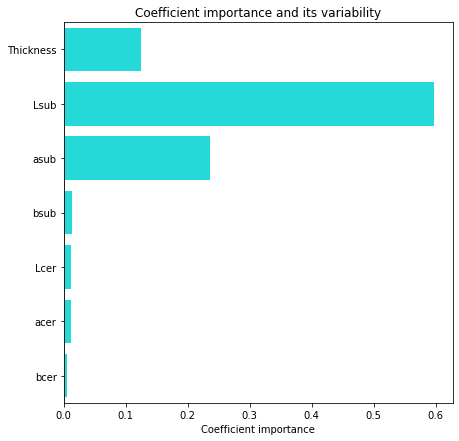

In [31]:
#Check features importance
fi = pd.DataFrame(model.feature_importances_, index = ['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']).transpose()
print(fi.round(3))

#Plot Feature importance
plt.figure(figsize=(9, 7))
sns.barplot(data=fi, orient='h', color='cyan', saturation=0.7)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [32]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.round(fi, decimals =2)

Thickness  Lsub  asub  bsub  Lcer  acer  bcer
0       0.12  0.60  0.24  0.01  0.01  0.01  0.01

[Text(0.6440135542168675, 0.95, 'asub <= 5.471\nfriedman_mse = 94.957\nsamples = 1536\nvalue = [[68.001]\n[0.693]\n[8.522]]'),
 Text(0.42055722891566266, 0.85, 'Lsub <= 84.29\nfriedman_mse = 40.384\nsamples = 1160\nvalue = [[74.745]\n[1.229]\n[12.064]]'),
 Text(0.23042168674698796, 0.75, 'bsub <= 12.845\nfriedman_mse = 3.859\nsamples = 771\nvalue = [[67.781]\n[1.279]\n[10.837]]'),
 Text(0.11295180722891567, 0.65, 'acer <= 0.272\nfriedman_mse = 2.596\nsamples = 388\nvalue = [[69.76]\n[1.009]\n[10.906]]'),
 Text(0.04819277108433735, 0.55, 'Thickness <= 0.6\nfriedman_mse = 0.7\nsamples = 90\nvalue = [[69.814]\n[0.749]\n[8.596]]'),
 Text(0.024096385542168676, 0.45, 'Thickness <= 0.4\nfriedman_mse = 0.1\nsamples = 48\nvalue = [[70.991]\n[0.812]\n[8.409]]'),
 Text(0.012048192771084338, 0.35, 'friedman_mse = 0.056\nsamples = 24\nvalue = [[71.078]\n[0.836]\n[8.724]]'),
 Text(0.03614457831325301, 0.35, 'friedman_mse = 0.073\nsamples = 24\nvalue = [[70.903]\n[0.789]\n[8.094]]'),
 Text(0.07228915

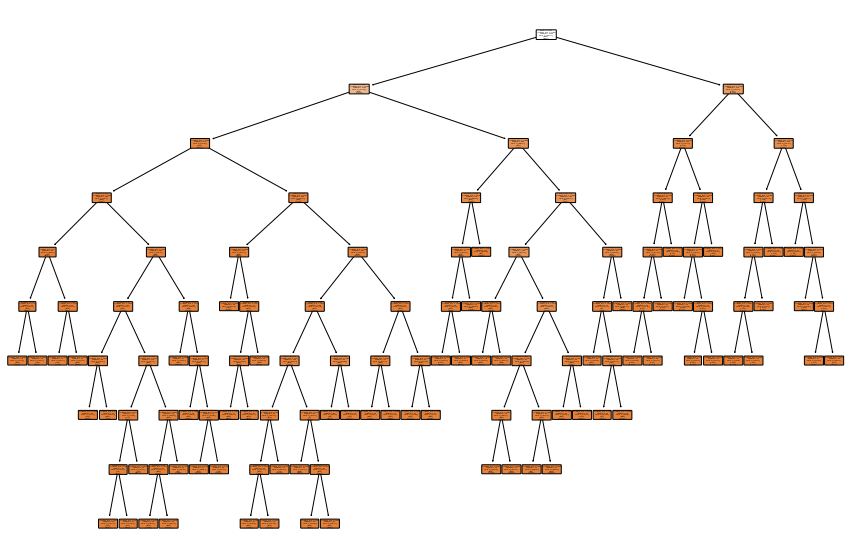

In [72]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'], 
          filled=True, impurity=True, 
          rounded=True)

In [73]:
fig.savefig('../images/decisiontreeLab.pdf', figsize=(150, 100))

In [33]:
pred = pd.DataFrame(model.predict(X_test), columns=['Lpred','apred','bpred'])

In [34]:
pred

Lpred  apred  bpred
0    93.03   0.34  11.61
1    70.78   1.02  11.04
2    92.74   0.38  12.28
3    54.57  -1.18  -2.10
4    68.60   1.34  14.04
..     ...    ...    ...
418  93.03   0.34  11.61
419  65.00  -0.46   6.70
420  91.87   0.51  11.92
421  71.81   0.72   9.19
422  69.36   0.70   8.71

[423 rows x 3 columns]

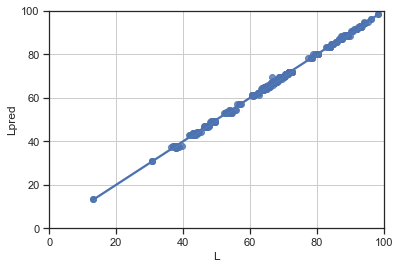

In [36]:
sns.set(style="ticks")
sns.regplot(y_test['L'], pred[['Lpred']])
#control x and y limits
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.grid()
 
plt.show()

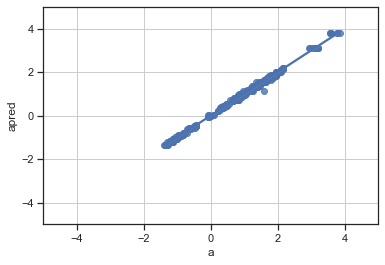

In [37]:
sns.set(style="ticks")
sns.regplot(y_test['a'], pred[['apred']])
#control x and y limits
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.grid()
 
plt.show()

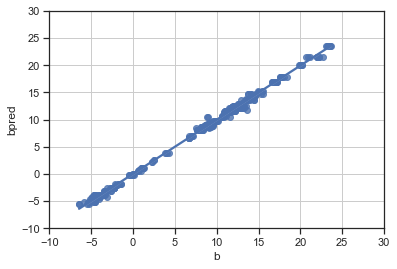

In [38]:
sns.set(style="ticks")
sns.regplot(y_test['b'], pred[['bpred']])
#control x and y limits
plt.ylim(-10, 30)
plt.xlim(-10, 30)
plt.grid()
 
plt.show()

In [45]:
predL = pred[['Lpred']].to_numpy()
yL = y_test['L'].reset_index()
yL = yL.drop(columns='index').to_numpy()
APE = pd.DataFrame(100*(abs(yL - predL)/yL), columns=[['APE']])
print (APE.mean())

APE   0.597
dtype: float64


In [ ]:
## Deploy

In [2]:
import gradio as gr

def greet(Thickness, Lsub, asub, bsub, Lcer, acer, bcer):
    list = [Thickness, Lsub, asub, bsub, Lcer, acer, bcer]
    df2 = pd.DataFrame(list).T
    output = model.predict(df2)
    Lf = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'L')
    af = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'a')
    bf = pd.DataFrame(output, columns = ['L', 'a', 'b'])._get_value(0, 'b')
    
    Lf = np.clip(Lf, np.min([Lcer,Lsub]), np.max([Lcer,Lsub]))
    af = np.clip(af, np.min([acer,asub]), np.max([acer,asub]))
    bf = np.clip(bf, np.min([bcer,bsub]), np.max([bcer,bsub]))
    
    
    return Lf, af, bf

demo = gr.Interface(fn=greet, inputs=[gr.Slider(0, 5, 0.1),
                                      gr.Slider(0, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2),
                                      gr.Slider(0, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2)], outputs=["number","number", "number"])
demo.launch()

AttributeError: module 'httpcore' has no attribute 'TimeoutException'